**Bilderkennung Code Fragment** <br> 
Lecture for Digitalisation in the Industry WS 21/22 <br> 
University Stuttgart, please refer to the original source under <br> 
https://keras.io/examples/timeseries/timeseries_classification_from_scratch/ <br> 
from 20.03.2022

# Anomalieerkennung in Zeitreihendaten mittels Machine Learning <br>
Nun möchten wir eine Möglichkeit vorstellen, mittels eines Machine Learning Algorithmus eine Anomalie in einem Motorengeräusch zu erkennen. <br> <br>
Der verwendete Datensatz heißt FordA, dieser enthält 3601 Trainingsinstanzen und weitere 1320 Testinstanzen. Jede Zeitreihe entspricht einer Messung des Motorgeräuschs, das von einem Motorsensor erfasst wird. Bei dieser Aufgabe besteht das Ziel darin, eine Anomalie im Motorgeräusch automatisch zu erkennen.

### Was sind Zeitreihen?
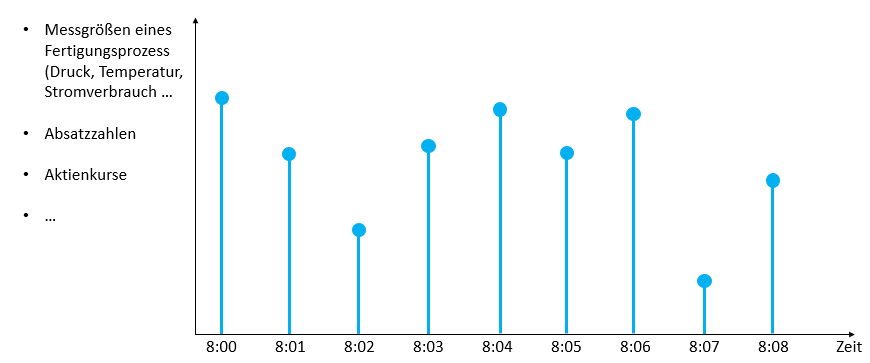

### Import der benötigten Pakete

Für Machine Learning Anwendungen ist *tensorflow* eine sehr beliebte Bibliothek. TensorFlow ist eine End-to-End-Open-Source-Plattform für maschinelles Lernen welche von Google entwickelt und in deren Anwendungen wie z.B. der Google Sprachsteuerung oder Google Maps genutzt wird.
<br>
<br>
Tensorflow wird oft in Kombination mit *keras* genutzt. Die Bibliothek stellt eine Art Interface zur Verfügung, welches die Programmierung von neuronalen Netzen stark vereinfacht. Der Fokus von Keras liegt auf einer schnellen Bereitstellung von neuronalen Netzen für experimentelle Zwecke. 

In [1]:
!pip install matplotlib

In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### Laden des Datensatz

**Vorstellung des Datensatzes** <br>
Dieser Datensatz wurden von Ford für einen Programmierwettbewerb auf dem IEEE World Congress on Computational Intelligence (2008) publiziert. Die Messwerte wurden mit einem Mikrofon im Motorraum aufgezeichnet und sollen das Erkennen eines spezifischen Motorfehlers ermöglichen. <br>
Der Datensatz ist wie folgt aufgebaut:
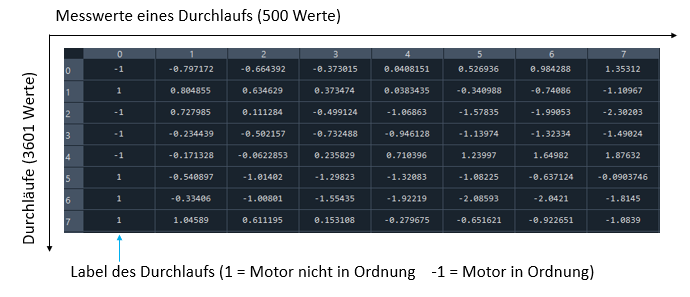

**Funktion definieren** <br>
Zum laden der Datensätze definieren wir eine Funktion über den *def* Befehl. <br>
Dieser erlaubt es, einen neuen Funktionsnamen zu erstellen und die damit verbundene Befehlsabfolge zu definieren. <br>
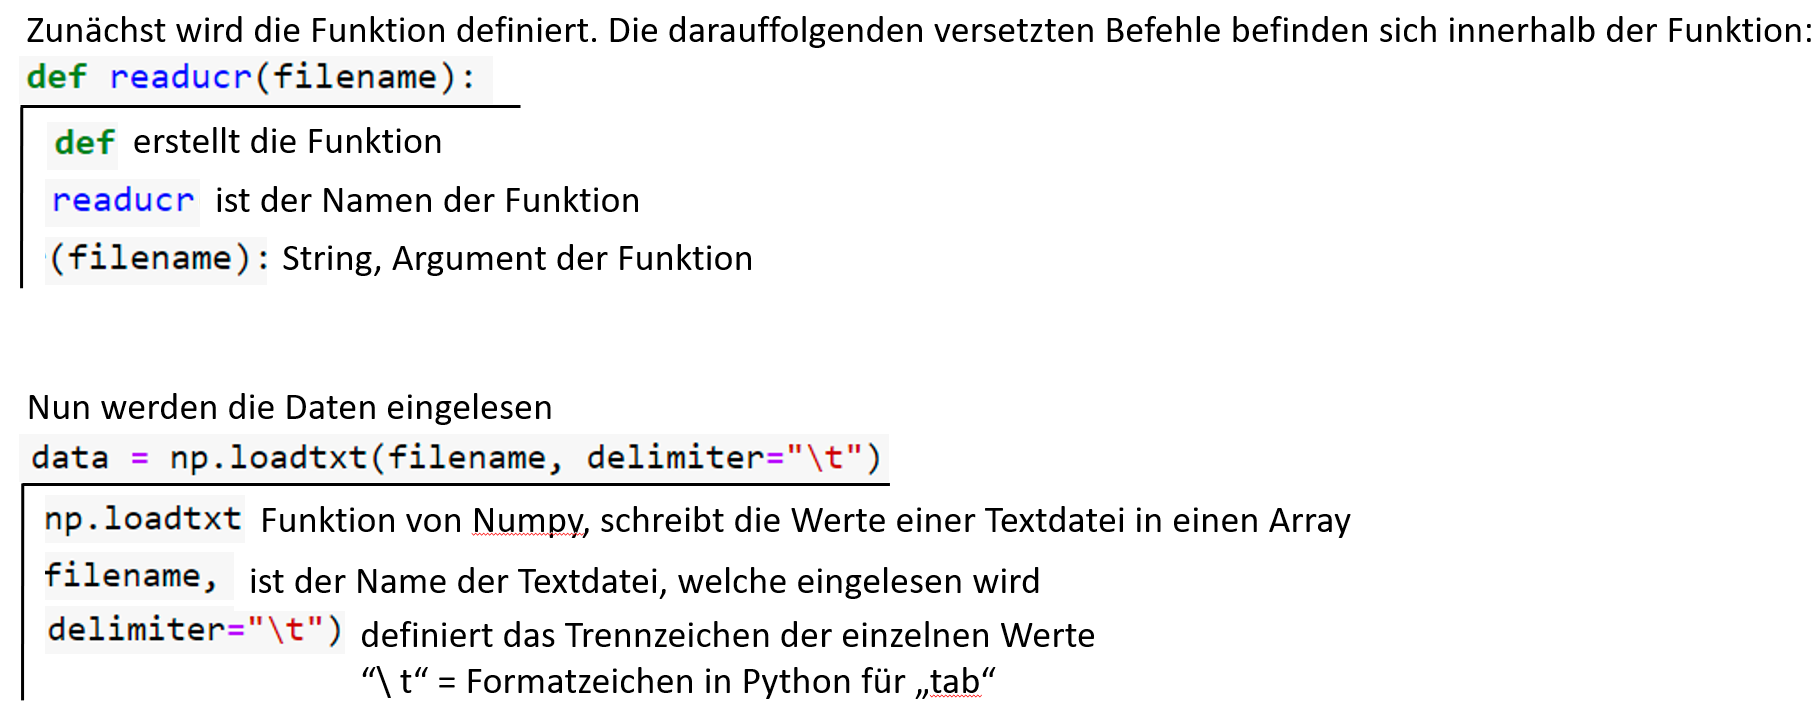
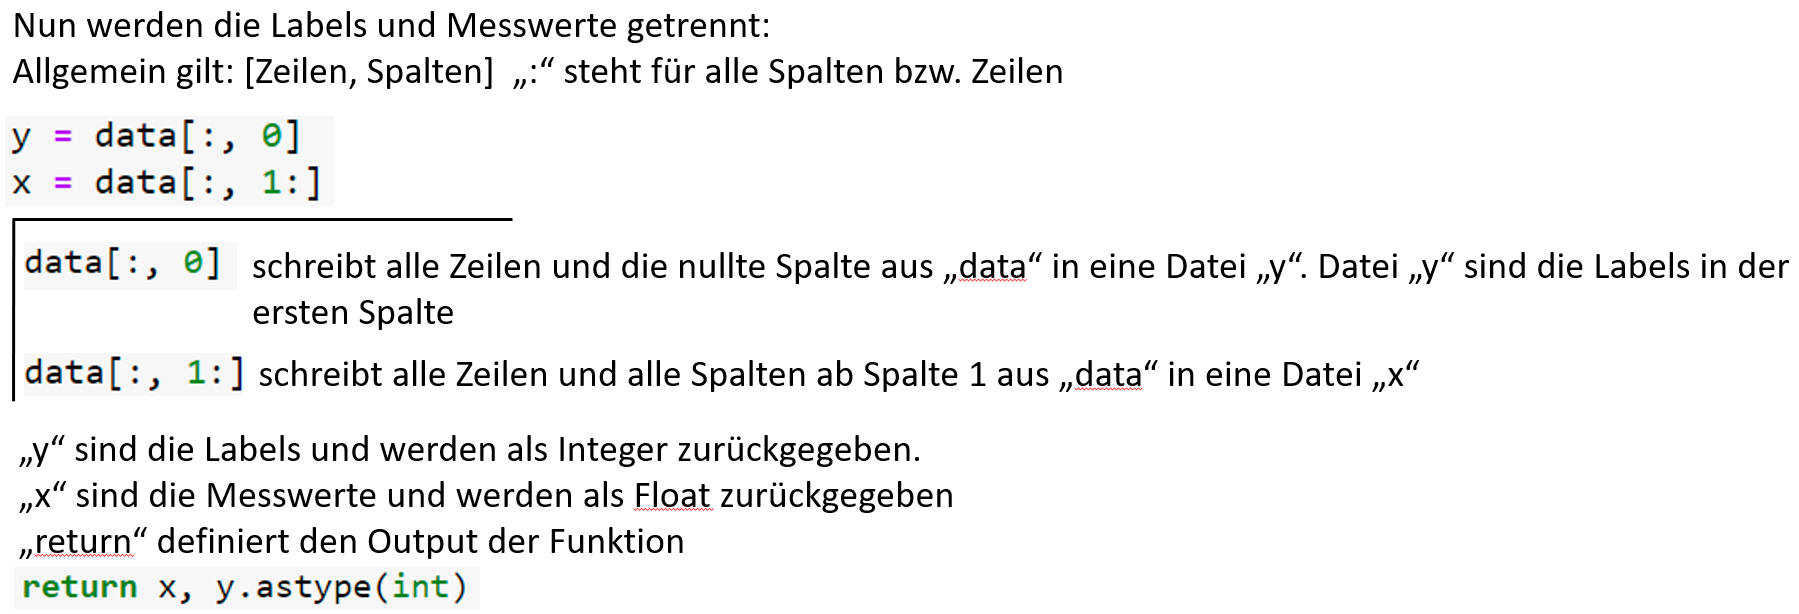

In [3]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)

**Funktion anwenden** <br>
Nun wenden wir die Funktion *readucr* an, um die Daten direkt von der Website einzulesen:

In [4]:
root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

# Nun werden die Trainings- und Testdatendaten mittels der zuvor definierten Funtion geldaen
x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

**Untersuchung der Datensätze** <br>
Schauen wir uns nun die geladenen Trainingsdatensätze an:
<br>
x_train:
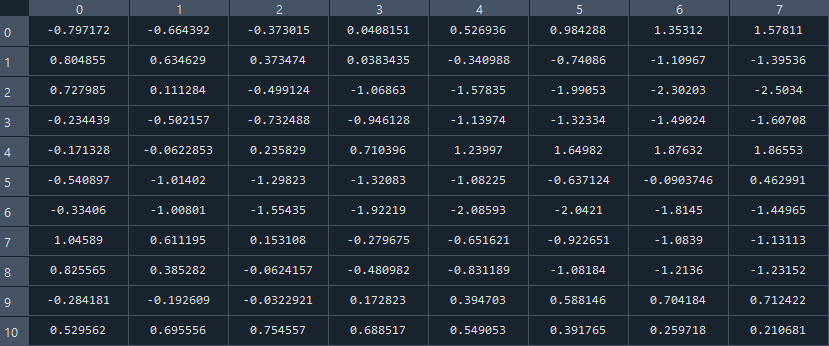
<br>
y_train:



### Visualisierung der Daten
<br>
Hier visualisieren wir ein Zeitreihenbeispiel für jedes Label (classes) im Datensatz. <br>
Zunächst müssem wir alle vorhandenen Label identifizieren:

In [5]:
# Zunächst wird ein Array mit den vorhandenen Labels erstellt. *np.concatenate* führt zwei Arrays zusammen.
classes_combined = np.concatenate((y_train, y_test), axis=0)
print (classes_combined)
# Nun werden alle mehrfach vorkommmenden Werte gelöscht, sodass ein Array mit allen vorhandenen Labeln vorliegt.
classes = np.unique(classes_combined)
print(classes)

[-1  1 -1 ...  1  1  1]
[-1  1]


Wie erwartet wurden die Labels -1 und 1 gefunden.

**Plotten einer Messreihe** <br>
Nun schauen wir uns die erste Messung je Label an.

3601
1800500
877500
923000
[-2.3443909e-01 -5.0215697e-01 -7.3248781e-01 -9.4612801e-01
 -1.1397394e+00 -1.3233365e+00 -1.4902429e+00 -1.6070774e+00
 -1.6204299e+00 -1.5069335e+00 -1.2465595e+00 -8.5266042e-01
 -3.5861746e-01  1.6580247e-01  6.5951163e-01  1.0734395e+00
  1.3638567e+00  1.5240868e+00  1.5641444e+00  1.5040580e+00
  1.3538423e+00  1.1201733e+00  8.1640365e-01  4.8259083e-01
  1.3876364e-01 -1.8436717e-01 -4.5876130e-01 -6.4235835e-01
 -7.3582594e-01 -7.4584032e-01 -7.1913529e-01 -6.7907776e-01
 -6.4569648e-01 -6.2232958e-01 -5.7225766e-01 -4.7545194e-01
 -3.2857430e-01 -1.3863481e-01  4.3793891e-02  1.7214492e-01
  2.0586001e-01  1.5712334e-01  5.5978059e-02 -4.8171539e-02
 -9.7909648e-02 -3.3483775e-02  1.4310320e-01  3.7910886e-01
  6.0610158e-01  7.5297921e-01  7.5631734e-01  6.4615911e-01
  4.6590019e-01  2.6060531e-01  9.2029843e-02 -1.8796011e-02
 -8.8562890e-02 -1.3696575e-01 -2.0773406e-01 -3.3525056e-01
 -4.9548071e-01 -6.4235835e-01 -7.3916406e-01 -7.4584032e-

<Figure size 432x288 with 0 Axes>

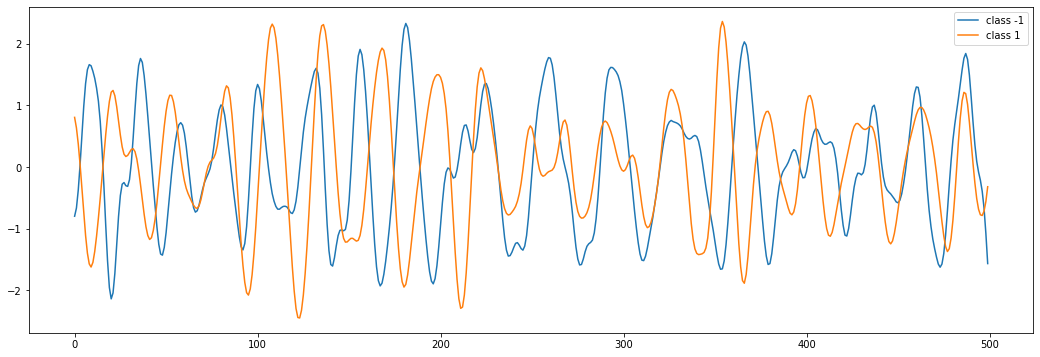

In [6]:
plt.figure()
plt.figure(figsize=(18, 6))
# Nun werden die Testdaten anhand der Labels aufgeteilt.
print (y_train.size)
print (x_train.size)
print (x_train[y_train == 1].size)
print (x_train[y_train == -1].size)
print (x_train[3])


for c in classes:
    # Es wird ein neuer array erstellt, in welchem die Messwerte nach zugehörigen Labels getrennt werden.
    c_x_train = x_train[y_train == c]
    # Plotten der ersten Messreihen je Label
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

Zur Verdeutlichung nehmen wir nun die Spalte 100 anstatt 0:

<Figure size 432x288 with 0 Axes>

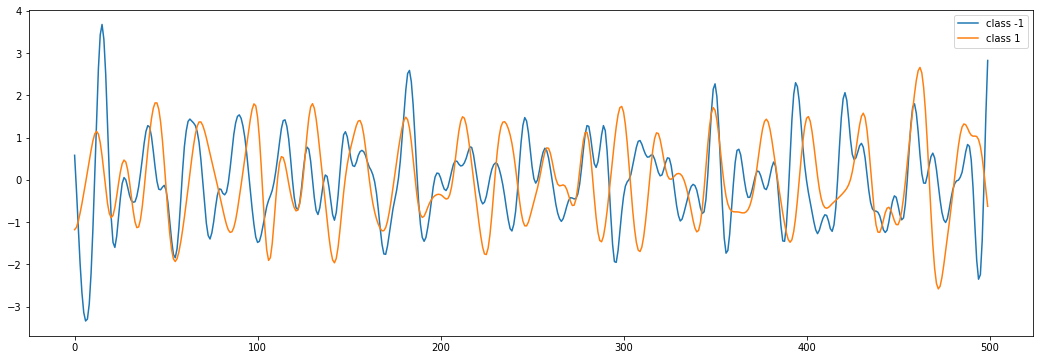

In [7]:
plt.figure()
plt.figure(figsize=(18, 6))
# Nun werden die Testdaten anhand der Labels aufgeteilt.
for c in classes:
    # Es wird ein neuer array erstellt, in welchem die Messwerte nach zugehörigen Labels getrennt werden.
    c_x_train = x_train[y_train == c]
    # Plotten der hundertsten Messreihen je Label
    plt.plot(c_x_train[100], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

### Vorbereiten der Daten
Unsere Zeitreihen sind bereits in einer einzigen Länge (500). Ihre Werte liegen jedoch in verschiedenen Bereichen. Dies ist für ein neuronales Netzwerk nicht ideal, im Allgemeinen sollten wir versuchen die Eingabewerte zu normalisieren. Für diesen speziellen Datensatz sind die Daten bereits z-normalisiert: Jede Zeitreihenstichprobe hat einen Mittelwert von null und eine Standardabweichung von 1. Diese Art der Normalisierung ist sehr verbreitet bei Zeitreihenklassifikationsproblemen.
<br>
In unserem Beispiel haben die Zeitreihen bereits eine einheitliche Länge (500). Dies ist jedoch oftmals nicht der Fall, weshalb die Form der Arrays vereinheitlicht werden muss. Hierfür wird die Funktion *respahe* verwendet. <br>
Diese wird nun anhand eines simplen Beispiels veranschaulicht.

In [8]:
# Beispielarray erstellen
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
print(arr)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [9]:
# Beispielarray reshapen
# Syntax: reshape(Anzahl Zeilen, Anzahl Spalten)
newarr = arr.reshape(4, 3,)
print(newarr)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


Nun wenden wir die Funktion auf unsere Trainings- und Testdaten an:

In [10]:
print(x_train.shape)

(3601, 500)


In [11]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Die verwendete Anzahl stellen die Anzahl der ersten Zeile und Spalte dar:
print('Anzahl der Messreihen:', x_train.shape[0], '\nAnzahl der Messwerte pro Reihe:', x_train.shape[1])

Anzahl der Messreihen: 3601 
Anzahl der Messwerte pro Reihe: 500


Um schließlich *parse_categorical_crossentropy* verwenden zu können, müssen wir vorher die Anzahl der Klassen zählen. <br>
Die Funktion *len* gibt die Anzahl der Zeilen eines Arrays oder einer Liste wieder.

In [12]:
num_classes = len(np.unique(y_train))

print(num_classes)

2


Jetzt mischen wir den Trainingssatz, um später die *validation_split* Option beim Training verwenden zu können. <br>
Hierfür verwenden wir die Funktion *random.permutation*. Diese vertauscht die Werte einer Datei nach dem Zufallsprinzip. <br>
Zur veranschulichung ziehen wir wieder unseren Beispielarray heran:

In [13]:
arrrandom = np.random.permutation(arr)
print('arr =', arr, '\narrrandom =', arrrandom)

arr = [ 1  2  3  4  5  6  7  8  9 10 11 12] 
arrrandom = [10  8  4  1  9 12  7  2  6  5  3 11]


Zunächst erstellen wir eine neue Liste *idx*, welche die Anzahl (3601) der Zeilen des Arrays *x_train* in zufälliger Reihenfolge enthält:

In [14]:
idx = np.random.permutation(len(x_train))

print(idx)

[2020 2626 1845 ... 3418 3362 2890]


Nun sortieren wir die Messerte (x_train) und deren Labels (y_train) entlang der idx Liste. Somit werden die Werte zufällig vertauscht. Jede Messreihe besitzt jedoch noch das richtige zugehörige Label.

In [15]:
x_train = x_train[idx]
y_train = y_train[idx]

Nun müssen wir noch die zu erwartenden Labels anpassen, da wir mit dem Datentyp *boolean* arbeiten. Dieser Datentyp hat seinen Ursprung in der klassischen Logik und wird verwendet um die Wahrheit einer logischen Aussage zu überprüfen. Dabei kann boolean nur zwei Werte annehmen **True** oder **False**. Hierfür müssen die zu erwarteten Labels **0** oder **1** darstellt. Also schreiben wir nun jede **-1** zu einer **0** um:

In [16]:
# Boolsche Variable 0 und 1 = falsch und wahr
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

### Machine Learning - Modell bauen
<br>
Die Vorbereitung der Datensätze ist abgeschlossen, nun können wir das ML- Modell bauen. In unserem Beispiel handelt es sich um ein Fully Convolutional Neural Network (Gefaltetes Neuronales Netzwerk). Dabei handelt es sich um eine Sonderform eines künstlichen neuronalen Netzes, das speziell für maschinelles Lernen und die Verarbeitung von Bild- oder Audiodaten vorgesehen ist.<br>



**Convolutional Neural Network** <br>
Das hier vorgestellte Convolutional Neural Network besteht aus einem Input-Layer, drei Convolutional-Layer, einem Pooling-Layer und einem Output-Layer. Ziel ist es Muster in den Trainingsdaten zu erkennen und diese einem Label zuzuschreiben. Die Testdaten werden anschließend auf diese Muster untersucht und auf Grundlage der zuvor trainierten Zusammenhänge einem Label zugeschrieben. <br>
Zunächst stellen wir die gesamte Funktion zu Erstellung des ML-Models vor und erklären anschließend die einzelnen Schritte.

**Woher kommen diese Zahlen? Durch rumprobieren???**

In [17]:
def make_model(input_shape):
    
    input_layer = keras.layers.Input(input_shape)
    
    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])

Sehen wir uns nun die Form des Input-Layers an:

In [18]:
input_shape=x_train.shape[1:]
input_layer = keras.layers.Input(input_shape)
print(input_layer.shape)

(None, 500, 1)


Der Input-Layer besteht aus einer Messreihe mit den 500 Messwerten. 
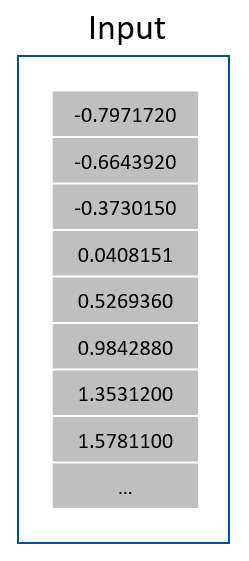

### Conv1D
Schauen wir uns nun an, was in den Faltungsschichten passiert. 

In [19]:
conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)

Nun wird die erste Faltungsschicht mit dem Namen *conv1* erstellt. Es werden 64 Filter mit der Form 3x1 erstellt, welche zunächst zufällig generierte Gewichte beinhalten. Die Input-Daten werden wie folgt verrechnet:

<br>
Dieses Verfahren wird auf alle 500 Messwerte angewendet:
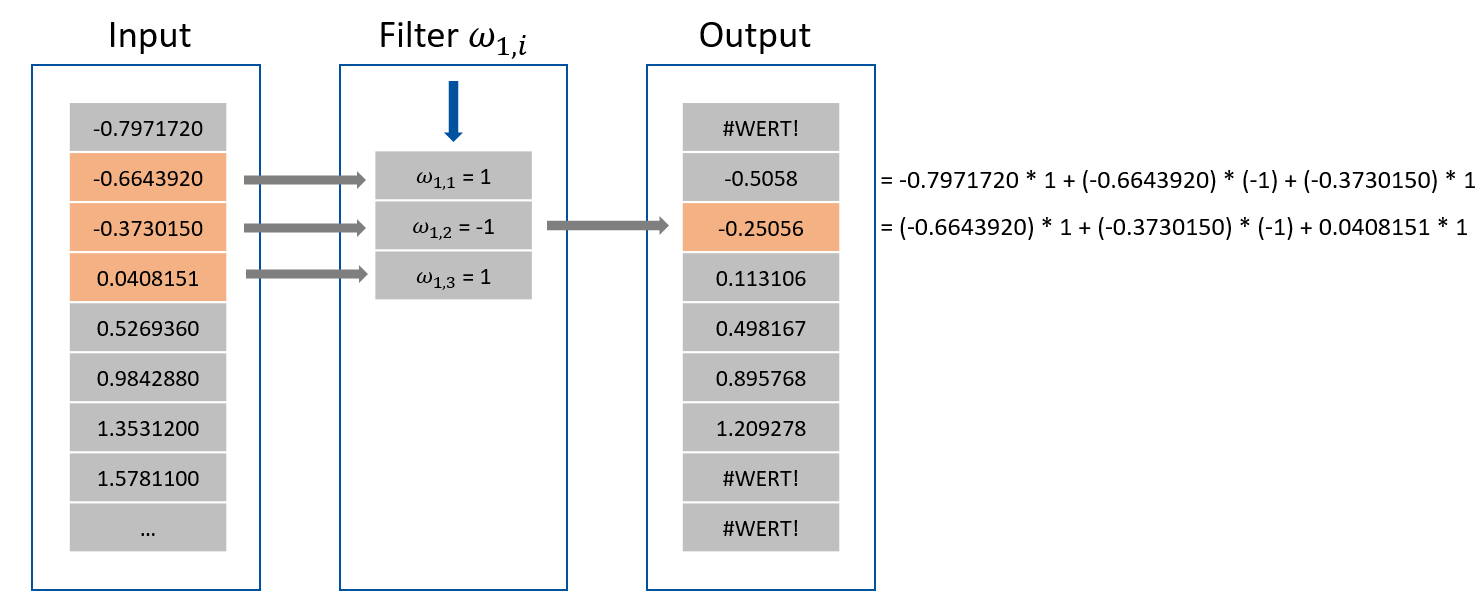
<br>
Dieses Vorgehen wird mit 64 Filtern durchgeführt. Diese besitzen zunächst alle zufällig generierte Gewichte und jeder erzeugt eine eigene Output-Spalte:
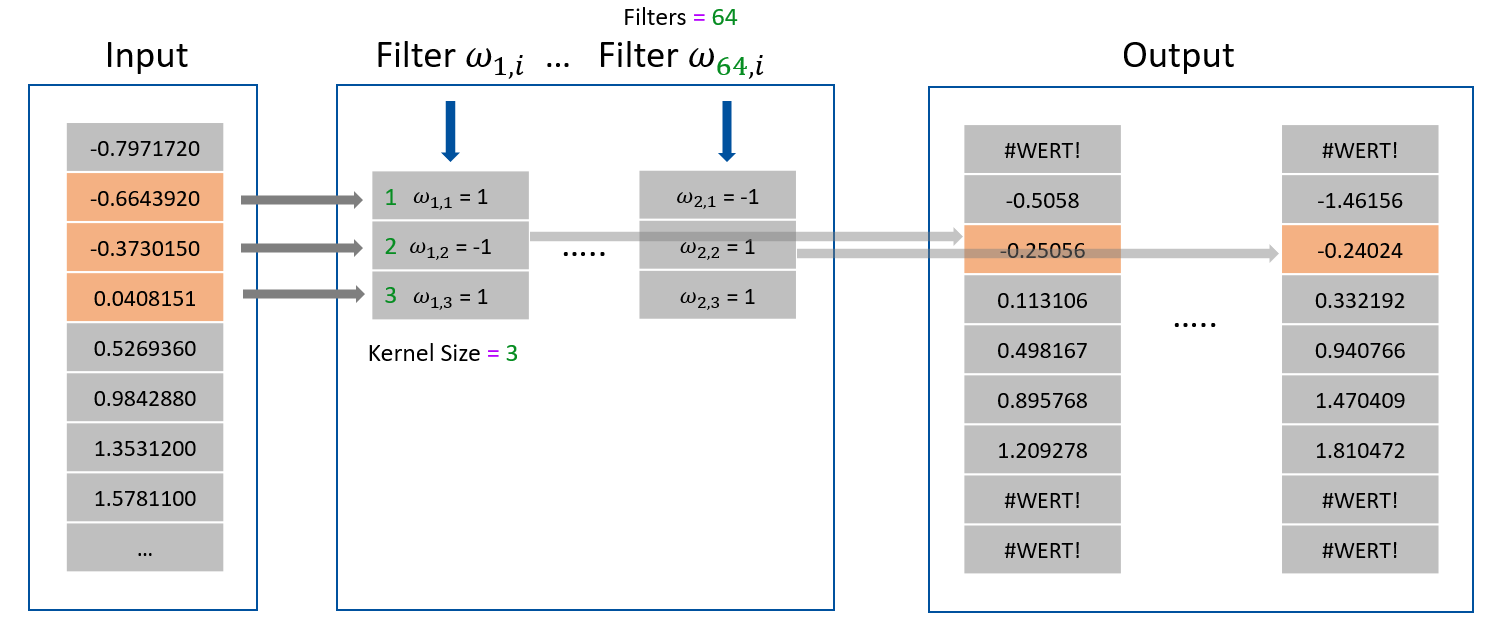

**Padding** <br>
Nun besteht noch das Problem der Randwerte. Diese können nach diesem Verfahren nicht berechnet werden, da ein oberer bzw. unterer Wert fehlt (bei Kernel Size = 3). Die hierbei verwendeten Lösungsansätze werden mit dem Wort "padding" (auffüllen) zusammengefasst. Padding = same beduetet, dass die benötigten Stellen mit einer 0 aufgefüllt werden um auch die Randwerte berechnen zu können. Dies bringt eine vertretbare "Verunreinigung" des Ergebnisses mit sich, bietet jedoch den Vorteil, dass die Länge des Outputs der des Inputs entspricht.
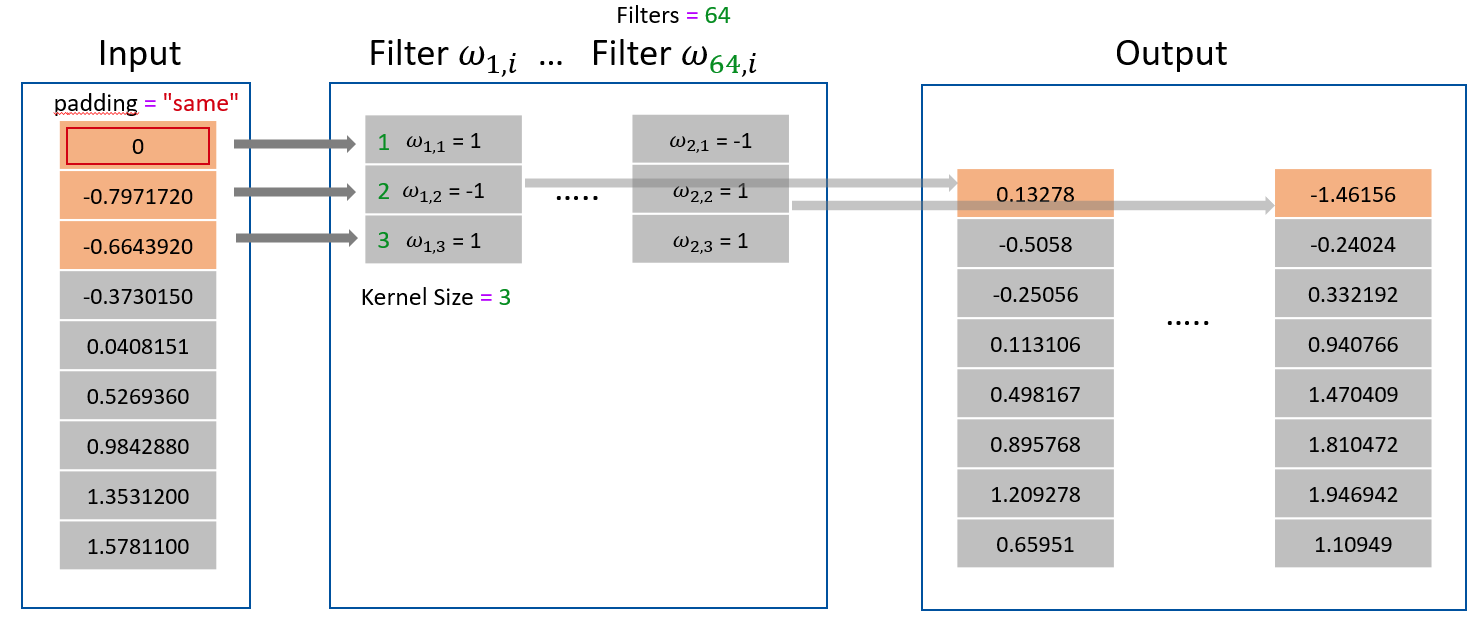
<br> 
Schauen wir uns nun die Form des Outputs an:

In [20]:
print(conv1)

KerasTensor(type_spec=TensorSpec(shape=(None, 500, 64), dtype=tf.float32, name=None), name='conv1d_3/BiasAdd:0', description="created by layer 'conv1d_3'")


Wie erwartet besteht der Output aus 500 Zeilen und für jeden Filter eine Spalte (64)

### BatchNormalization
Bei der Batch Normalisation wird von jedem Wert der Mittelwert des Batchs abgezogen und mit seiner Standardabweichung multipliziert. Dieser Schritt ist nicht zwingend notwendig hilft jedoch dabei künstliche neuronale Netze schneller und stabiler zu machen, indem die Eingaben der Schichten durch Neuzentrierung und Neuskalierung normalisiert werden.
![image.png](attachment:image.png

Quelle: https://towardsdatascience.com/batch-normalization-in-practice-an-example-with-keras-and-tensorflow-2-0-b1ec28bde96f

In [21]:
conv1 = keras.layers.BatchNormalization()(conv1)
print(conv1)

KerasTensor(type_spec=TensorSpec(shape=(None, 500, 64), dtype=tf.float32, name=None), name='batch_normalization_3/batchnorm/add_1:0', description="created by layer 'batch_normalization_3'")


### Aktivierungsfunktion - ReLu
Die Aktivierungsfunktion bestimmt, wie der Aktivierungszustand eines Neurons von der Eingabe aller anderen Neuronen, die mit diesem Neuron verbunden sind, abhängt. Der Aktivierungszustand eines Neurons kann  entweder aktiv oder inaktiv sein. Die ReLu Funktion sieht wie folgt aus:
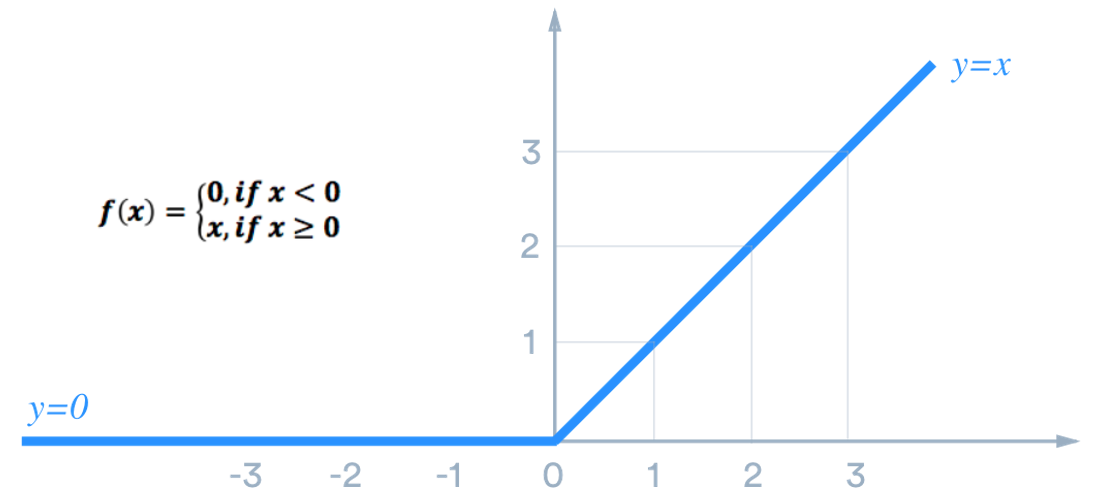
<br>
Somit wandelt die ReLu Funktion alle negativen Werte in 0 um und alle potiviven Werte beleiben bestehen.
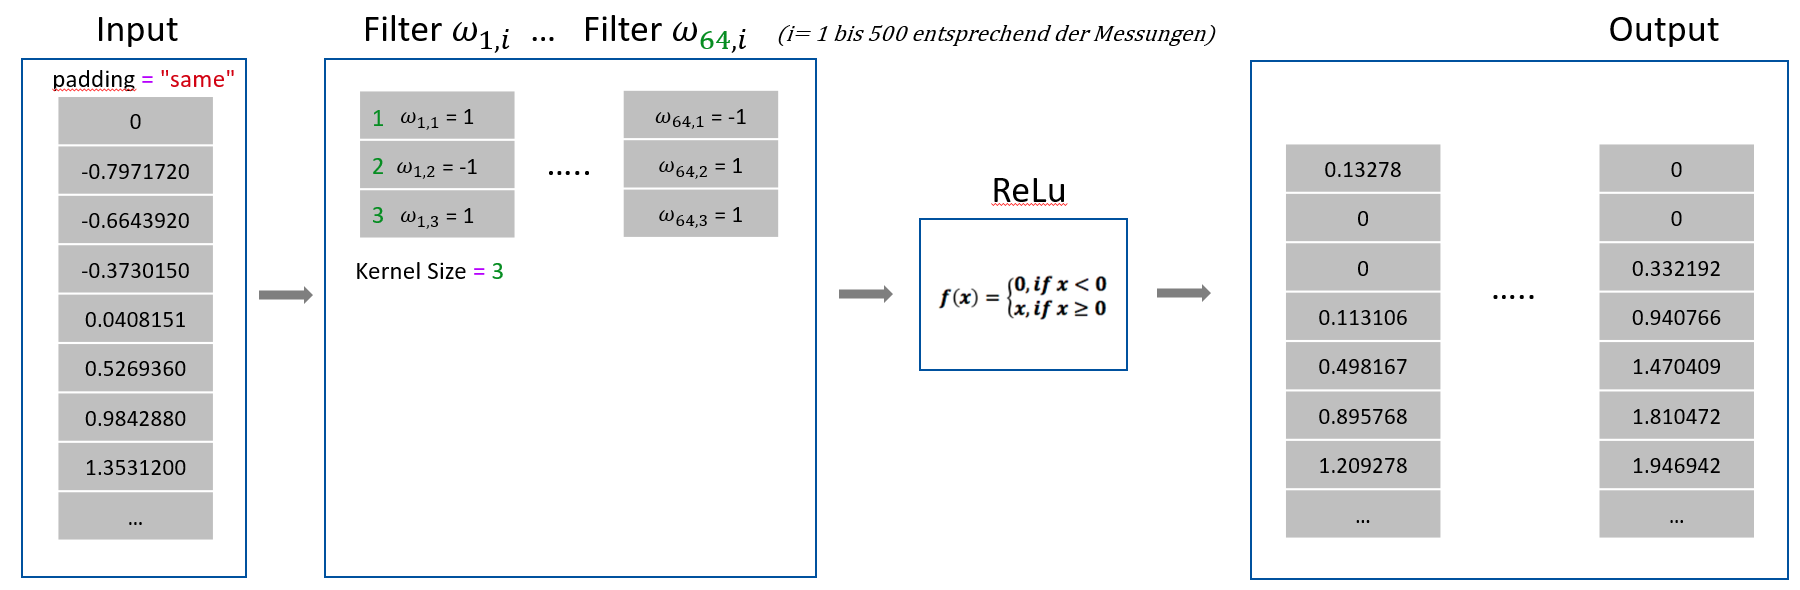

In [22]:
conv1 = keras.layers.ReLU()(conv1)
print(conv1)

KerasTensor(type_spec=TensorSpec(shape=(None, 500, 64), dtype=tf.float32, name=None), name='re_lu_3/Relu:0', description="created by layer 're_lu_3'")


### Pooling
Pooling (Zusammenlegung) minimiert die Dimension der Daten. Dafür gibt es verschieden Verfahren, das hier verwendete GlobalAveragePooling fasst die gleichen Zeilen der einzelnen Filter zusammen und bildet den deren Durchschnittswert. Diesers Vorgehen wandelt beliebig viele Spalten in einen Vektor um.
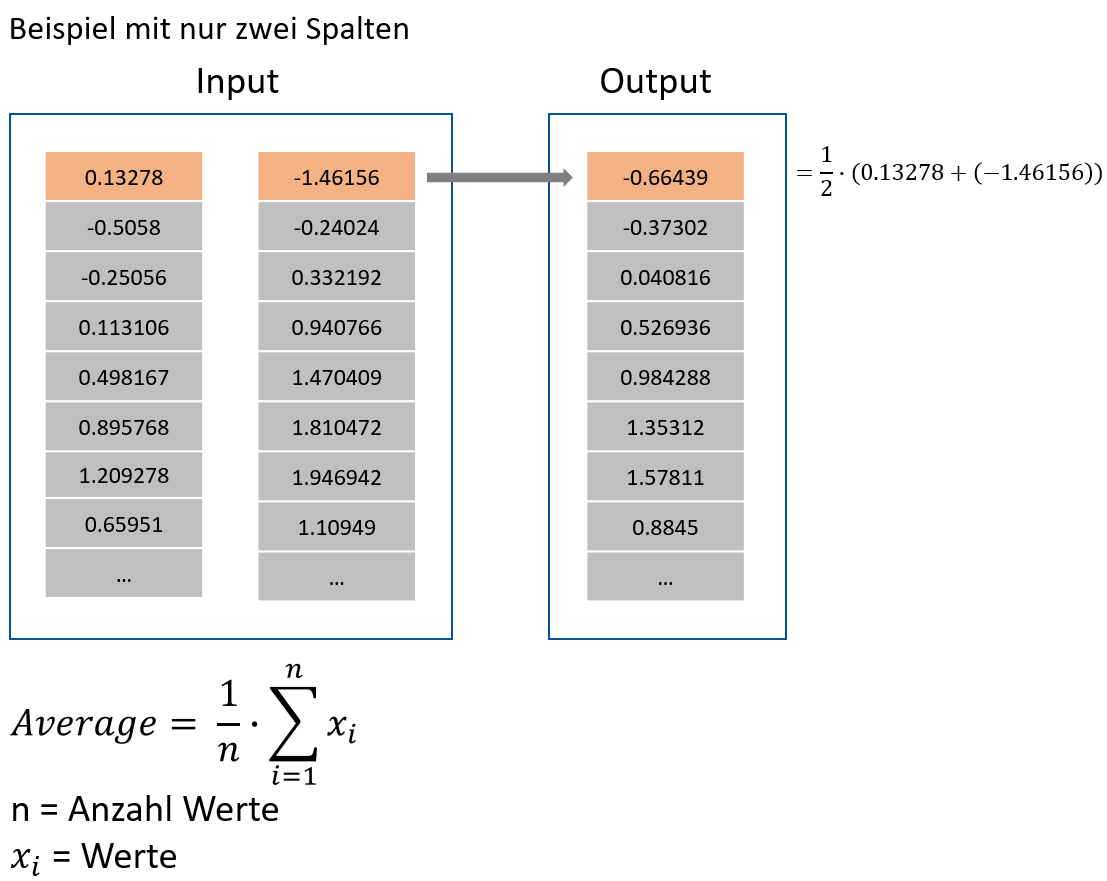

In [23]:
gap = keras.layers.GlobalAveragePooling1D()(conv1)
print(gap.shape)

(None, 64)


### Softmax
Die Softmax-Funktion stellt meist den letzten Layer eines Neuronalen Netzwerks dar. Die Softmax-Regression ist eine Form der logistischen Regression, die einen Eingabewert in einen Vektor von Werten normalisiert, der einer Wahrscheinlichkeitsverteilung folgt, deren Gesamtsumme 1 ergibt. Sie ist folgendermaßen definiert:
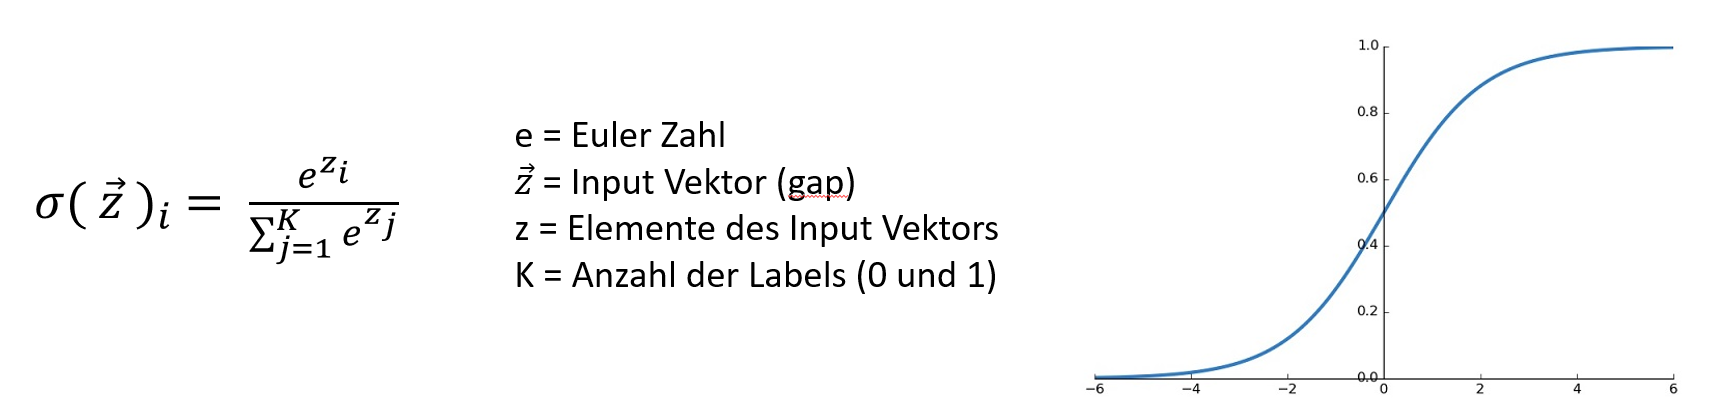




Da es sich um eine Exponentialfunktion handelt, steigt der Output - Wert überproportional zum Input - Wert. Somit werden vorhandene Unterschiede nochmals vertärkt. Da die Werte normalisiert werden, ergeben die Ergebnisse der Softmax - Funktion in der Summe 1 und liegen zwischen zwischen 0 und 1. Somit können diese als Wahrscheinlichlkeiten gesehen werden. <br>

**Somit sztellt das Ergebnis die Wahrscheinlichkeiten zu den vorhandenen Labels dar. Anhand dieser kann das Netzwerk trainiert werden.**

In [24]:
output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)
print(output_layer.shape)

(None, 2)


### Trainieren des Modells
Nun können wir unser Convolutional Neural Network trainieren.
<br>
**Epochen*** <br>
Epochs beschreibt die Anzahl, wie oft die gesamten Trainingsdaten verwendet werden. 
<br>
**Batch_Size*** <br>
Die batch_size beschreibt, nach wie vielen Messreihen die Backpropagation durchgeführt wird, heißst die Gewichte der Filter angepasst werden.

### Backpropagation - wie lernt das Netzwerk?
Die Gewichte der Filter (ω) sind variabel und bestimmen die Output Größe jedes Neurons. Ziel des Trainings ist es, die Gewichte so anzupassen, dass der zu erwartende Fehler bei der Zuordnung minimal wird.
Da die Gewichte zunächst nicht bekannt sind, werden zufällige Werte gewählt. Wenn sich der Wert von dem erwarteten Feedforward-Netzwerk unterscheidet, also das Label der Daten nicht richtig zugeordnet wurde, werden die Gewichte der Filter erneut verändert. Dabei wird nach jeder Epoche der Fehler und dessen Gradient berechnet. Anhand dessen bewegt man sich entlang der Funktion bis der Fehler minimal wird.
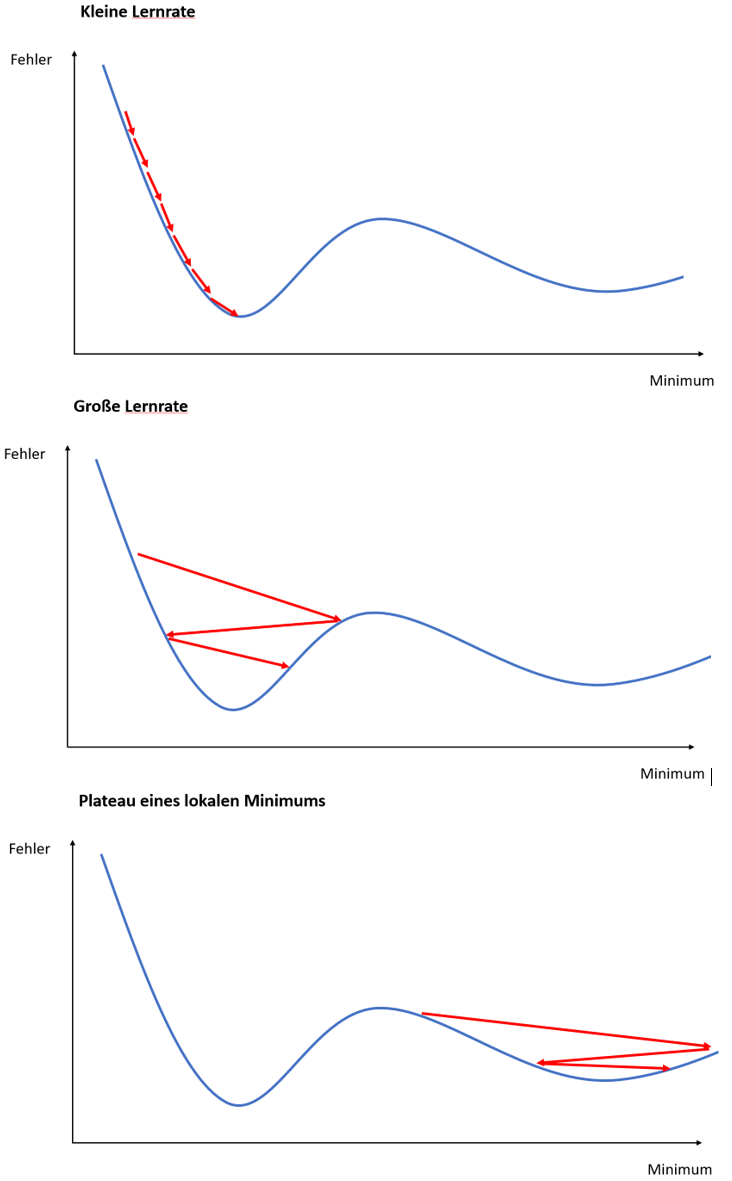
Die Lernrate darf nicht zu groß klein gewählt werden, da das Training sonst zu viele Epochen benötigt. Ungeduldige erhöhen die Lernrate möglicherweise aber so sehr, dass der Lernalgorithmus im Minimum der Fehlerfunktion vorbeiläuft und diesen stets überspringt. Ebenfalls besteht die Gefahr, dass nicht das globale sonder ein lokales Minimum gefunden wird.

In [25]:
# Gesamter Trainingscode

epochs = 5 # Im Original epochs = 500 brauch aber sehr lange zum berechnen!
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "epochs=5.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

model.save("epochs_005")

# Deklaration zum spätren Plotten des Lernfortschritts
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

INFO:tensorflow:Assets written to: epochs_005\assets


INFO:tensorflow:Assets written to: epochs_005\assets


Epoch 1/5
90/90 [==============================] - 20s 37ms/step - loss: 0.5648 - sparse_categorical_accuracy: 0.6993 - val_loss: 0.7372 - val_sparse_categorical_accuracy: 0.5021 - lr: 0.0010
Epoch 2/5
90/90 [==============================] - 3s 31ms/step - loss: 0.4484 - sparse_categorical_accuracy: 0.7840 - val_loss: 0.7766 - val_sparse_categorical_accuracy: 0.5021 - lr: 0.0010
Epoch 3/5
90/90 [==============================] - 3s 32ms/step - loss: 0.4333 - sparse_categorical_accuracy: 0.7823 - val_loss: 0.7530 - val_sparse_categorical_accuracy: 0.5021 - lr: 0.0010
Epoch 4/5
90/90 [==============================] - 3s 32ms/step - loss: 0.4281 - sparse_categorical_accuracy: 0.7944 - val_loss: 0.6693 - val_sparse_categorical_accuracy: 0.5784 - lr: 0.0010
Epoch 5/5
90/90 [==============================] - 3s 32ms/step - loss: 0.4045 - sparse_categorical_accuracy: 0.7951 - val_loss: 0.6140 - val_sparse_categorical_accuracy: 0.5784 - lr: 0.0010


### Callbacks
Ein Callback ist ein Objekt, das Aktionen in verschiedenen Stadien des Trainings ausführen kann (z. B. zu Beginn oder am Ende einer Epoche, vor oder nach einem einzelnen Stapel usw.).

In [26]:
callbacks = [
    
    # Speicher die Gewichte nach jeder Epoche, falls der Fehler geringer ist als zuvor
    # Somit kann das System bei Verschlechterung zurückgesetzt werden
    # Die Gewichte mit dem geringsten Fehler werden unter dem Namen "best_model.h5" gespeichert
    keras.callbacks.ModelCheckpoint(
        "epochs=5.h5", save_best_only=True, monitor="val_loss"
    ),
    
    # Passt die Lernrate an, um ggf. lokale Minima zu überwinden und das globale Minimum zu finden
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    
    # Beendet das Training, wenn sich keine weitere Verbesserung der Zielgröße einstellt
    # monitor = Zielgröße; "val_loss" = Minimierung des Fehlers
    # patience = Anzahl der Epochen ohne Verbesserung, nach denen das Training beendet wird
    # verbose = Ausführlichkeit der Outputanzeige während des Trainings (0 oder 1. Modus 0 ist still, und Modus 1 zeigt Meldungen an)
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

### Model compile
**optimizer="adam"** <br>
Adams Optimierungsalgorithmus ist eine Erweiterung des stochastischen Gradientenabstiegsalgorithmus und stellt den am häufigsten eingesetzten optimizer im Machine Learning dar. Adams Algorithmus unterscheidet sich vom traditionellen stochastischen Gradientenabstieg. Der stochastische Gradientenabstieg behält eine einzelne Lernrate bei, um alle Gewichte zu aktualisieren, und die Lernrate ändert sich während des Trainingsprozesses nicht. Adam berechnet unabhängige adaptive Lernraten für verschiedene Parameter, indem er die Schätzungen des ersten und zweiten Moments des Gradienten berechnet.
<br>
**loss="sparse_categorical_crossentropy"** <br>
Definiert die Art der Fehlerfunktion

<br>
**metrics="sparse_categorical_accuracy"**
<br>
Berechnet, wie oft Vorhersagen mit ganzzahligen Labels übereinstimmen.

In [27]:
model.compile(
    
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

### Bewertung des Models anhand der Testdaten
Nun können wir betrachten, wie gut unser System die defekten Motoren anhand ihrer Akustik identifizert:

In [28]:
model = keras.models.load_model("epochs=5.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

42/42 [==============================] - 1s 12ms/step - loss: 0.6260 - sparse_categorical_accuracy: 0.5705
Test accuracy 0.5704545378684998
Test loss 0.6260296702384949


### Visualisierung der Trainings- und Validierungsverlust des Modells

In [29]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.figure(figsize=(18, 5))
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("5 epochs model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

<Figure size 432x288 with 0 Axes>

### Einfluss der Epochenanzahl
Nun steigern wir die Anzahl der durchlaufenen Trainingsepochen und betrachten die Auswirkung auf die Genauigkeit des Models.

In [30]:
# 10 Epochen

epochs = 10 # Im Original epochs = 500 brauch aber sehr lange zum berechnen!
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "epochs=10.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

model.save("epochs_010")

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

INFO:tensorflow:Assets written to: epochs_010\assets


INFO:tensorflow:Assets written to: epochs_010\assets


Epoch 1/10
90/90 [==============================] - 4s 36ms/step - loss: 0.4112 - sparse_categorical_accuracy: 0.7997 - val_loss: 0.6581 - val_sparse_categorical_accuracy: 0.6214 - lr: 0.0010
Epoch 2/10
90/90 [==============================] - 3s 33ms/step - loss: 0.3906 - sparse_categorical_accuracy: 0.8097 - val_loss: 0.4134 - val_sparse_categorical_accuracy: 0.8072 - lr: 0.0010
Epoch 3/10
90/90 [==============================] - 3s 32ms/step - loss: 0.3879 - sparse_categorical_accuracy: 0.8118 - val_loss: 0.3821 - val_sparse_categorical_accuracy: 0.8197 - lr: 0.0010
Epoch 4/10
90/90 [==============================] - 3s 31ms/step - loss: 0.3814 - sparse_categorical_accuracy: 0.8250 - val_loss: 0.4035 - val_sparse_categorical_accuracy: 0.7684 - lr: 0.0010
Epoch 5/10
90/90 [==============================] - 3s 31ms/step - loss: 0.3860 - sparse_categorical_accuracy: 0.8160 - val_loss: 0.4685 - val_sparse_categorical_accuracy: 0.7295 - lr: 0.0010
Epoch 6/10
90/90 [======================

In [31]:
model = keras.models.load_model("epochs=10.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

metric = "sparse_categorical_accuracy"
plt.figure()
plt.figure(figsize=(18, 5))
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("10 epochs model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

42/42 [==============================] - 1s 15ms/step - loss: 0.3285 - sparse_categorical_accuracy: 0.8561
Test accuracy 0.8560606241226196
Test loss 0.328469455242157


<Figure size 432x288 with 0 Axes>

In [32]:
# 50 Epochen

epochs = 50 # Im Original epochs = 500 brauch aber sehr lange zum berechnen!
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "epochs=50.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

model.save("epochs_050")


history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

INFO:tensorflow:Assets written to: epochs_050\assets


INFO:tensorflow:Assets written to: epochs_050\assets


Epoch 1/50
90/90 [==============================] - 4s 36ms/step - loss: 0.3502 - sparse_categorical_accuracy: 0.8444 - val_loss: 0.3661 - val_sparse_categorical_accuracy: 0.8169 - lr: 0.0010
Epoch 2/50
90/90 [==============================] - 3s 32ms/step - loss: 0.3339 - sparse_categorical_accuracy: 0.8514 - val_loss: 0.3417 - val_sparse_categorical_accuracy: 0.8350 - lr: 0.0010
Epoch 3/50
90/90 [==============================] - 3s 32ms/step - loss: 0.3342 - sparse_categorical_accuracy: 0.8517 - val_loss: 0.4117 - val_sparse_categorical_accuracy: 0.7670 - lr: 0.0010
Epoch 4/50
90/90 [==============================] - 3s 31ms/step - loss: 0.3338 - sparse_categorical_accuracy: 0.8420 - val_loss: 0.3683 - val_sparse_categorical_accuracy: 0.8294 - lr: 0.0010
Epoch 5/50
90/90 [==============================] - 3s 32ms/step - loss: 0.3286 - sparse_categorical_accuracy: 0.8597 - val_loss: 0.3758 - val_sparse_categorical_accuracy: 0.7809 - lr: 0.0010
Epoch 6/50
90/90 [======================

KeyboardInterrupt: 

In [ ]:
model = keras.models.load_model("epochs=50.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

metric = "sparse_categorical_accuracy"
plt.figure()
plt.figure(figsize=(18, 5))
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("50 epochs model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [ ]:
# 100 Epochen

epochs = 100 # Im Original epochs = 500 brauch aber sehr lange zum berechnen!
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "epochs=100.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

model.save("epochs_100")


history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

In [ ]:
model = keras.models.load_model("epochs=100.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

metric = "sparse_categorical_accuracy"
plt.figure()
plt.figure(figsize=(18, 5))
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("100 epochs model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [ ]:
# 500 Epochen

epochs = 500 # Im Original epochs = 500 brauch aber sehr lange zum berechnen!
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "epochs=500.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=75, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

model.save("epochs_500")


history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

In [ ]:
model = keras.models.load_model("epochs=500.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

metric = "sparse_categorical_accuracy"
plt.figure()
plt.figure(figsize=(18, 5))
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("500 epochs model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

Wir können sehen, wie die Trainingsgenauigkeit nach 100 Epochen fast 0,95 erreicht. Wenn wir jedoch die Validierungsgenauigkeit beobachten, können wir sehen, wie das Netzwerk noch trainiert werden muss, bis es nach 200 Epochen sowohl für die Validierung als auch für die Trainingsgenauigkeit fast 0,97 erreicht. Wenn wir nach der 200. Epoche weiter trainieren, beginnt die Validierungsgenauigkeit abzunehmen, während die Trainingsgenauigkeit weiter zunimmt: Das Modell beginnt mit dem Overfitting.